# [LLaMa(Large Language Model Meta AI)](https://velog.io/@srk/Open-source-LLMs-LLaMa-Alpaca-Vicuna-With-PEFT-LoRA)

- `Meta`는 자체 개발한 초대형 언어 모델(LLM)인 `LLaMA`의 소스코드를 공개하는 방식으로 `오픈소스` 전략을 적극적으로 추진하고 있다.
- 이를 통해 다양한 프로젝트에서 LLaMA를 원하는 목적에 맞게 커스터마이징하여 사용할 수 있게 되었다.
- 현재까지 LLM의 소스코드를 공개하고 있는 기업은 메타가 유일하며, 이런 개방성과 투명성 덕분에 메타는 인공지능 분야의 LLM 개발 프로젝트에서 가장 주목받고 있는 빅테크 기업 중 하나로 자리매김하고 있다.

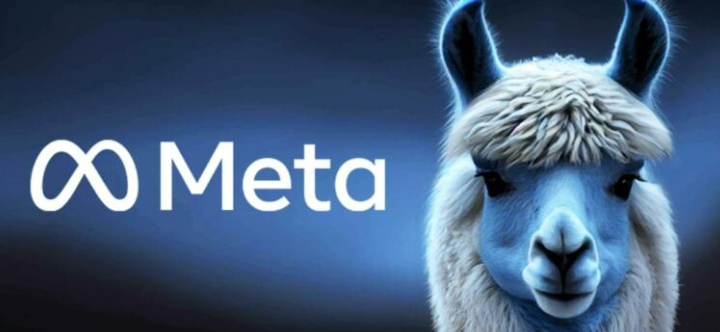

## sLLM(small Large Language Model)
- 매개변수와 훈련 데이터를 늘려가며 성능을 개선해오던 기존의 ‘언어모델 초거대화’ 트렌드가 바뀌고 있다.
- 적은 매개변수와 훈련 데이터만 가지고도 최대한의 가격대비 성능을 낼 수 있는 `sLLM(small Large Language Model)`의 출현과 함께 언어모델이 점점 더 경량화 되고 있다.

`메타의 LLaMA`는 70억, 130억, 330억, 650억개의 매개변수를 가지는 네 가지 모델로 구성되어 있다. 이 모델들은 1750억개의 매개변수를 가진 `GPT-3.5`와 비교했을 때 매개변수 수가 적지만, 그럼에도 불구하고 높은 성능과 모델 학습의 유연성을 자랑하며 개발자들 사이에서 인기를 끌고 있다.

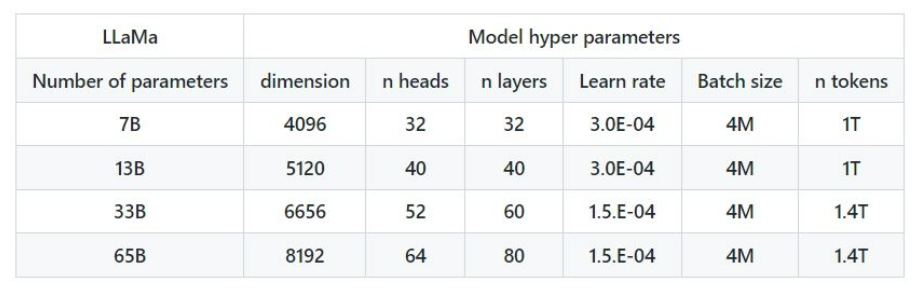

## LLaMA의 활용성과 유연성

- LLaMA의 큰 장점은 모델의 크기이다.
- 이 모델은 용량이 다른 모델의 10분의 1 수준에 불과하기 때문에 고성능 GPU뿐만 아니라 다양한 엣지 디바이스, 예를 들어 스마트폰 등에서도 AI 생성을 구현할 수 있다는 점에서 매력적이다.
- 이런 특징은 특정 목적에 맞게 개발되는 소규모 초대형 언어 모델(sLLM)의 개발에도 큰 도움이 된다.

## [LLaMA Achitecture](https://velog.io/@alstjsdlr0321/Chapter-8.-LLaMA-2-Part1)

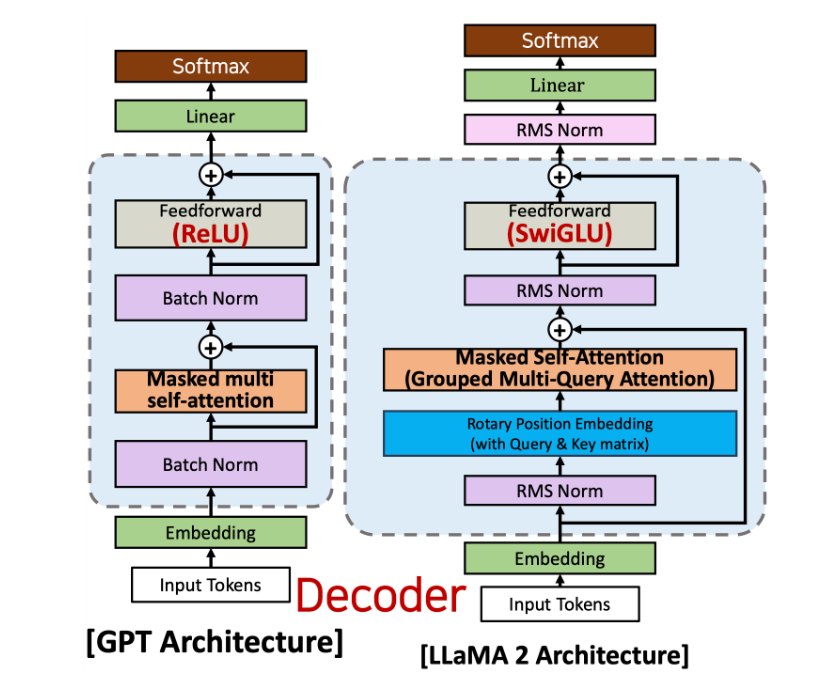

### Batch Normalization
- 학습과정에서 배치당 평균과 분산을 이용하여 데이터의 분포를 정규화하는 과정
- 학습 파라미터(γ,β)를 조정함으로써 Batch Normalization(배치 정규화)는 데이터가 목표 평균(target mean) 및 표준 편차(standart deviation)를 갖도록 보장합니다
- `GPT 에서 사용`

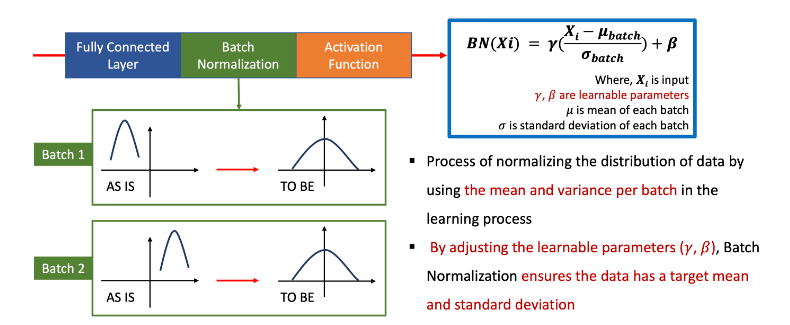

### RMS(Root Mean Square) Normalization
- RMS 정규화는 layer 내의 평균 제곱근(root mean square)을 계산하고 이 값을 사용하여 정규화한다.
- RMS 정규화에는 배치 정규화(γ,β)와 같은 학습 가능한 파라미터가 없다.

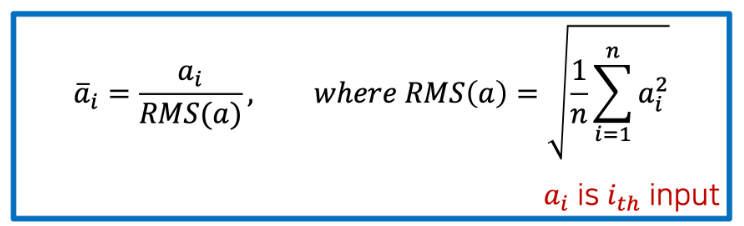

왜 LLaMA 는 RMS 정규화를 적용하는가

- `계산 효율성`
  - RMS 정규화에서는 입력의 합의 제곱근(square root of the sum of the input)만 계산하면 되지만, 배치 정규화에서는 입력의 평균과 분산(mean and variance of the input)을 계산해야 한다.
  - RMS 정규화는 배치 정규화보다 훨씬 빠르고 계산 비용이 적게 든다.
- `안정성`
  - 배치 정규화(Batch Normalization)는 매우 크거나 매우 작은 숫자를 다룰 때 수치 불안정으로 인해 어려움을 겪을 수 있습니다
    - 그래서 감마와 베타의 파라미터를 도입한 것이다
  - RMS Normalization은 이 문제를 덜 발생시킵니다
    - RMS 는 투트를 씌우고 n으로 나눠주고 그것을 실제 입력 값에다가도 나눠주기 떄문에 안정적이다
- `비선형성`
  - RMS 정규화는 모델에 비선형성을 제공하여 데이터에서 더 복잡한 패턴을 포착할 수 있습니다
  - 배치 정규화는 이러한 패턴을 효과적으로 포착하지 못할 수 있는 선형 변환입니다

### SwiGLU Activation Function
- SwiGLU는 시그모이드 컴포넌트를 사용하여 음수 입력에 대해 원활한 transition을 제공한다.
  - 그러나, SwiGLU는 ReLU에 비해 시그모이드 컴포넌트로 인해 계산적으로 더 비싸다.
- 활성화 함수을 SwiGLU로 변경하여 LlaMA의 성능을 향상시킬 수 있었다.

수식
- SwiGLU : 인풋에다가 시그모이드를 곱해줌
  - (-) 값을 잃어버리는 단점을 해결한다.
- non linear 의 장점도 있다 (좀 더 많은 패턴을 반영할 수 있다)

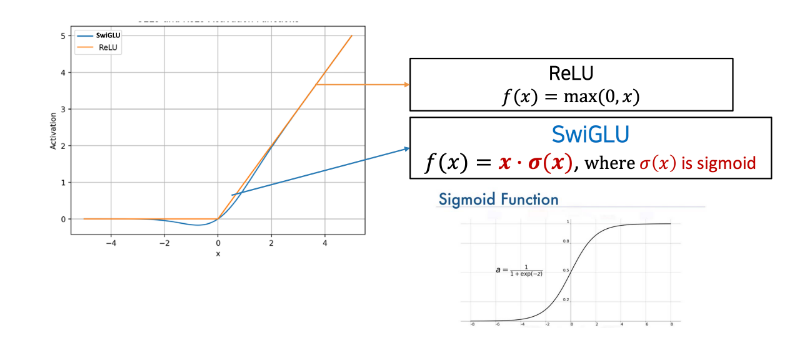

### Rotary Positional Embedding (RoPE)
- RoPE는 Relative Position Embedding based method 이며, 가산법(Additive method)이 아니라 곱셈법(Multiplicative method) + sinusoid method(Absolute Position을 사전에 주입)이다.
- Attention Layer 에서 Query와 Key의 Inner product를 수행할 때, rotation matrix를 곱하여 위치 정보(postional information) 반영
  - `Query` 와 `Key` 에 대해서만 `Rotary Positional Embedding을 적용`하는 것이다.

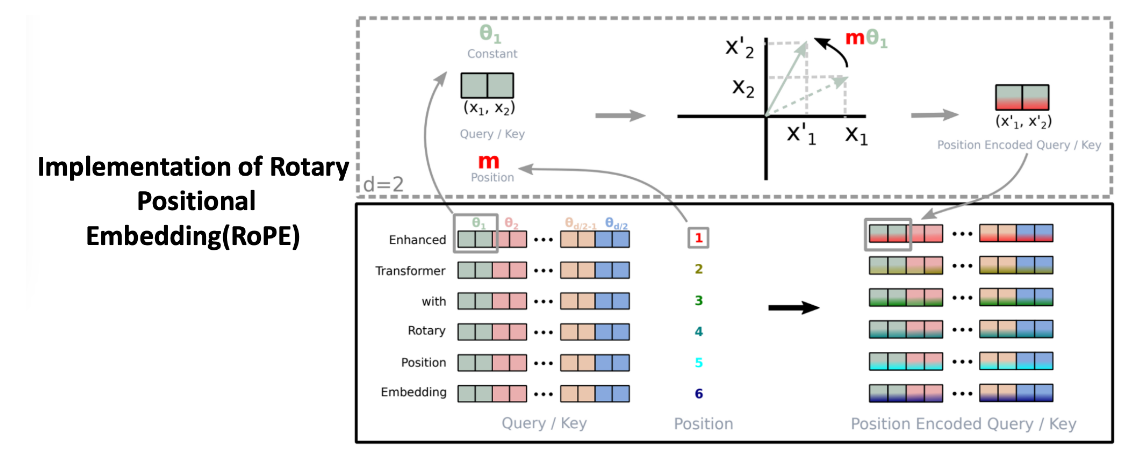

### Grouped Query Attention (GQA)
- `Multi-head Attention(MHA)`은 H(어텐션 헤드 개수)개의 QKV(Query, Key, Value)를 가진다.
  - 각각의 KV 텐서를 로드하기 위해서는 많은 메모리가 필요하다.
- `Multi-query Attention(MQA)`은 H개의 Q(Query)와 1개의 KV(Key, Value)를 가진다.
  - Multi-head Attention에 비해 모델의 성능을 저하시키고 모델의 학습을 불안정하게 만들 수 있다.
- `Grouped-query attention(GQA)`은 하나의 key로 계산, 하나의 value로 계산하여 컴퓨팅 타임을 줄이는 대안
  - Multi-query Attention같이 KV 헤드들의 숫자(K와 V에 대응하는 헤드개수)를 하나로 줄이는 것 대신, G개 만큼의 그룹을 짜서 축소하는 함으로써 불안정한 학습 해결

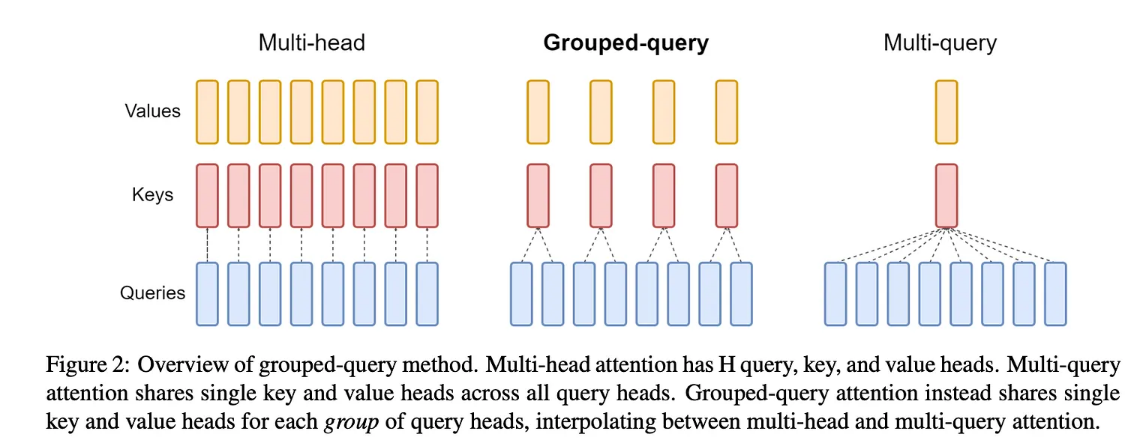

샘플당 컴퓨팅 비교
- GQA는 Multi-query Attention 만큼 빠르며 성능은 Multi-head Attention과 비슷하다.
- GQA, MHA, MQA 비교
  - 그룹의 개수를 증가시키면서 시가닝 점점 올라가면서 64개 올리니까 확 올라감
  - 모든 각각의 MHA 는 가장 많은 시간이 소요됨
- Inference : 새로운 입력 데이터를 모델에 적용하여 결과를 산출합니다

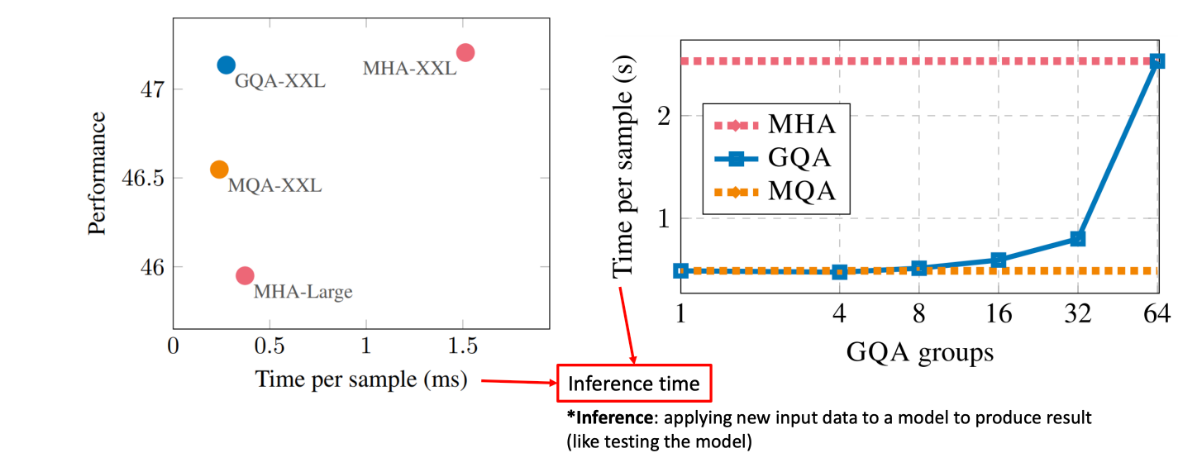

## [LLaMA 학습방법](https://cameronrwolfe.substack.com/p/llama-2-from-the-ground-up)

- `Unsupervised Learning (Pre-training)`
  - 사전 학습을 통해서 대형 생성 모델(PLM)을 만듭니다. 대형 생성 모델은 길들여지지 않은 괴물과 같이 거대하고 강력하지만 사람이 원하는 의도대로 동작하기 어려운 경우가 많기 때문에 서비스에 바로 적용하기에는 어렵습니다.
- `Supervised Fine-Tuning (SFT)`
  - 특정 도메인의 데이터 혹은 크라우드 소싱 등을 통해 구축한 양질의 (Prompt, Response) 데이터를 구축하여 fine-tuning하는 과정입니다. 이를 통해 입력 프롬프트에 대해 사람의 의도에 맞는 문장을 생성하는 방법을 학습합니다.
- `Reinforcement Learning from Human Feedback (RLHF)`
  - SFT 모델에 추가적으로 강화 학습을 적용하여 사람의 의도에 맞게 파인튜닝을 하는 과정입니다.

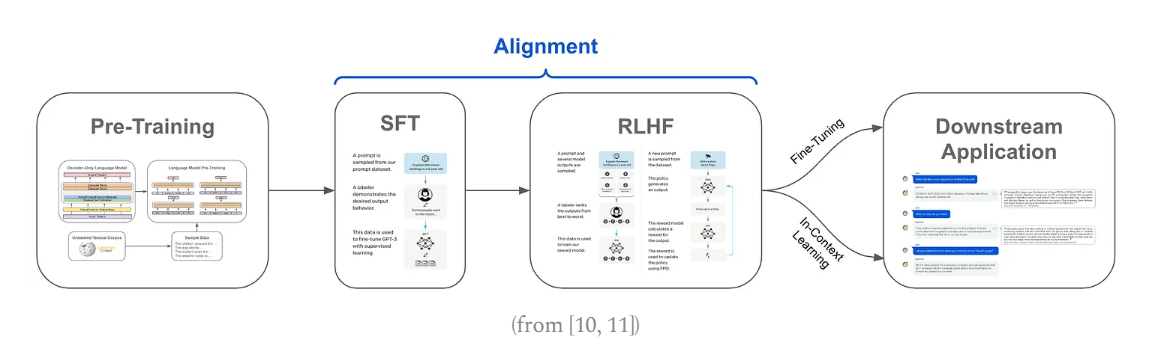

# [Llama 사용전 라이센스 적용](https://colab.research.google.com/drive/1BNYdT-TttVWcPYZNWvZ4GfXH3cLekE3e?usp=sharing#scrollTo=MrtXG8chiu4g)

## Setup

In [ ]:
!nvidia-smi

Tue Sep  3 01:40:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   34C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q transformers accelerate sentencepiece

## [HugginFace Token 생성 및 입력](https://huggingface.co/settings/tokens)

- Repositories permissions 적용
  - LLaMA와 같이 사전 permission을 한 Repository 추가

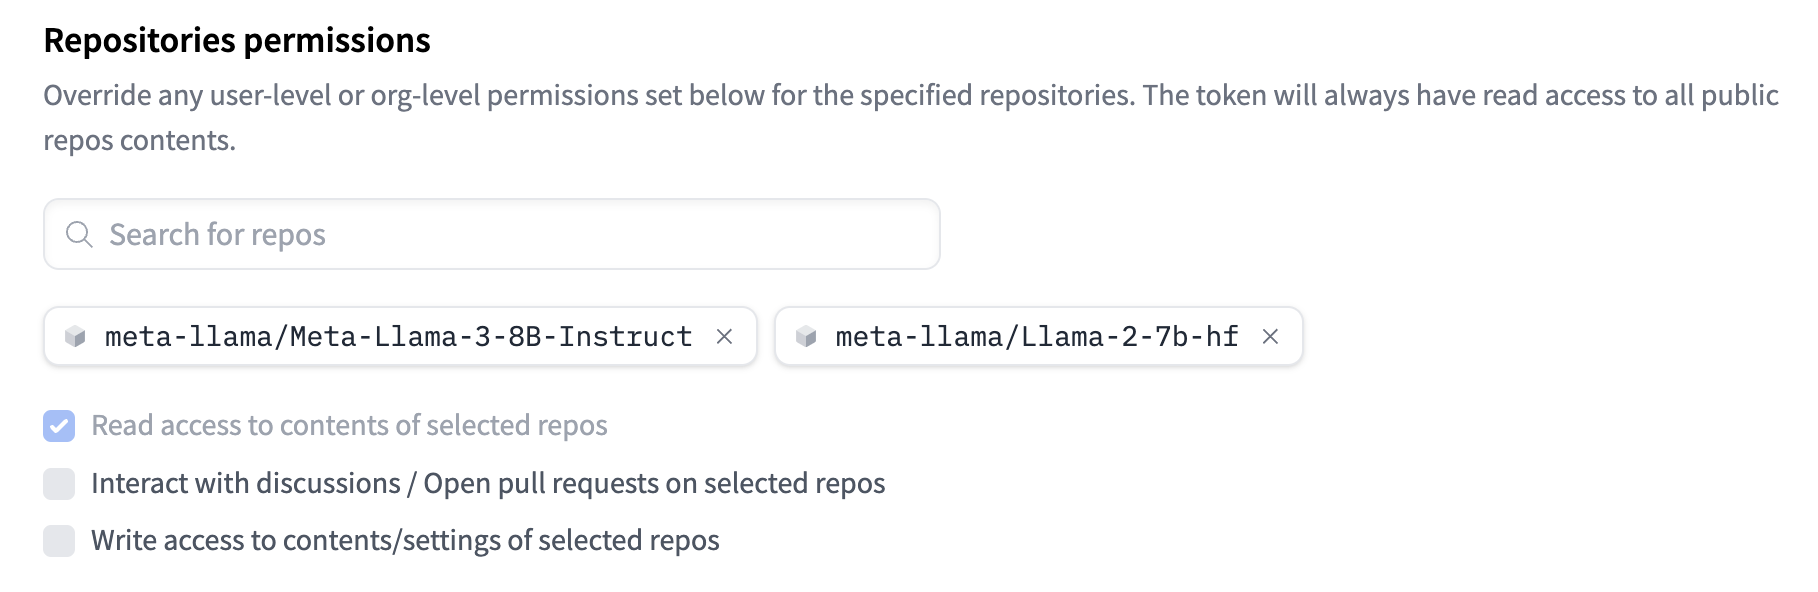

- Token 복사

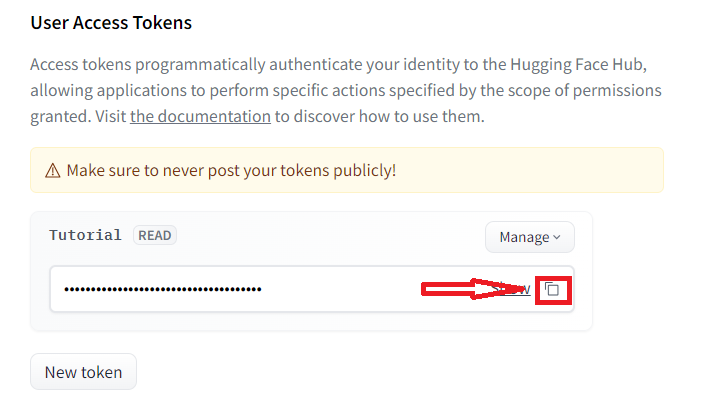

- Token을 이용한 Login
  - 서비스 배포에는 좋지 않음

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGr

- HuggingFace Token 설정

In [ ]:
import os
os.environ['HF_TOKEN'] = "hf_huggingface token"

# LLaMA 2

## [Llama 2 특징](https://modulabs.co.kr/blog/llama-2-intro/)
- Llama 2는 기존 버전보다 40% 더 많은 2조 개의 토큰으로 학습되었습니다.(1.4T→2T 토큰).
- 컨텍스트 길이도 2배 증가한 4096으로 설정됐습니다(2K→4K).
- 매개변수 규모에 따라 세 가지 모델이 제공됩니다(Llama-2-7B, 13B, 70B).
- 안전성(Safety)과 유용성(Helpfulness)을 위한 두 보상 모델(Rewards Model, RM)을 만들었습니다.
- 추론, 코딩, 지식 태스크를 포함하는 벤치마크 테스트에서 ‘MPT’, ‘Falcon’ 등의 타 LLM들보다 성능이 뛰어납니다.
- 무료로 상업적 이용이 가능합니다. 단, 월간 활성 사용자(MAU)가 7억 명⁺의 회사가 활용할 경우 메타와 별도의 라이센스 계약이 필요합니다.

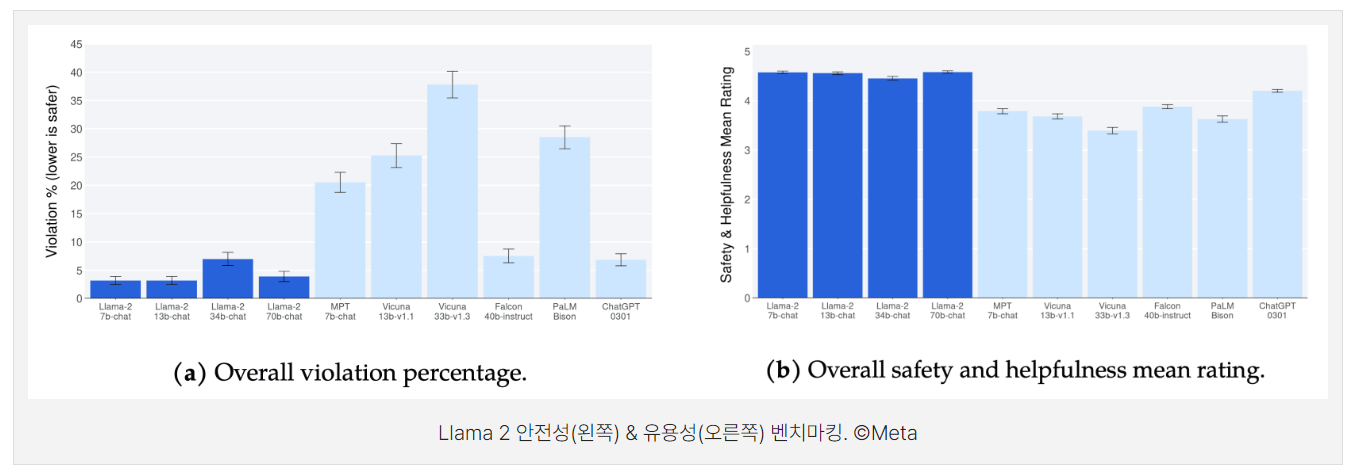

## [Llama 2 모델 사용](https://huggingface.co/meta-llama/Llama-2-7b-chat-hf)

### [라이센스 동의 신청](https://huggingface.co/meta-llama/Llama-2-7b-hf)

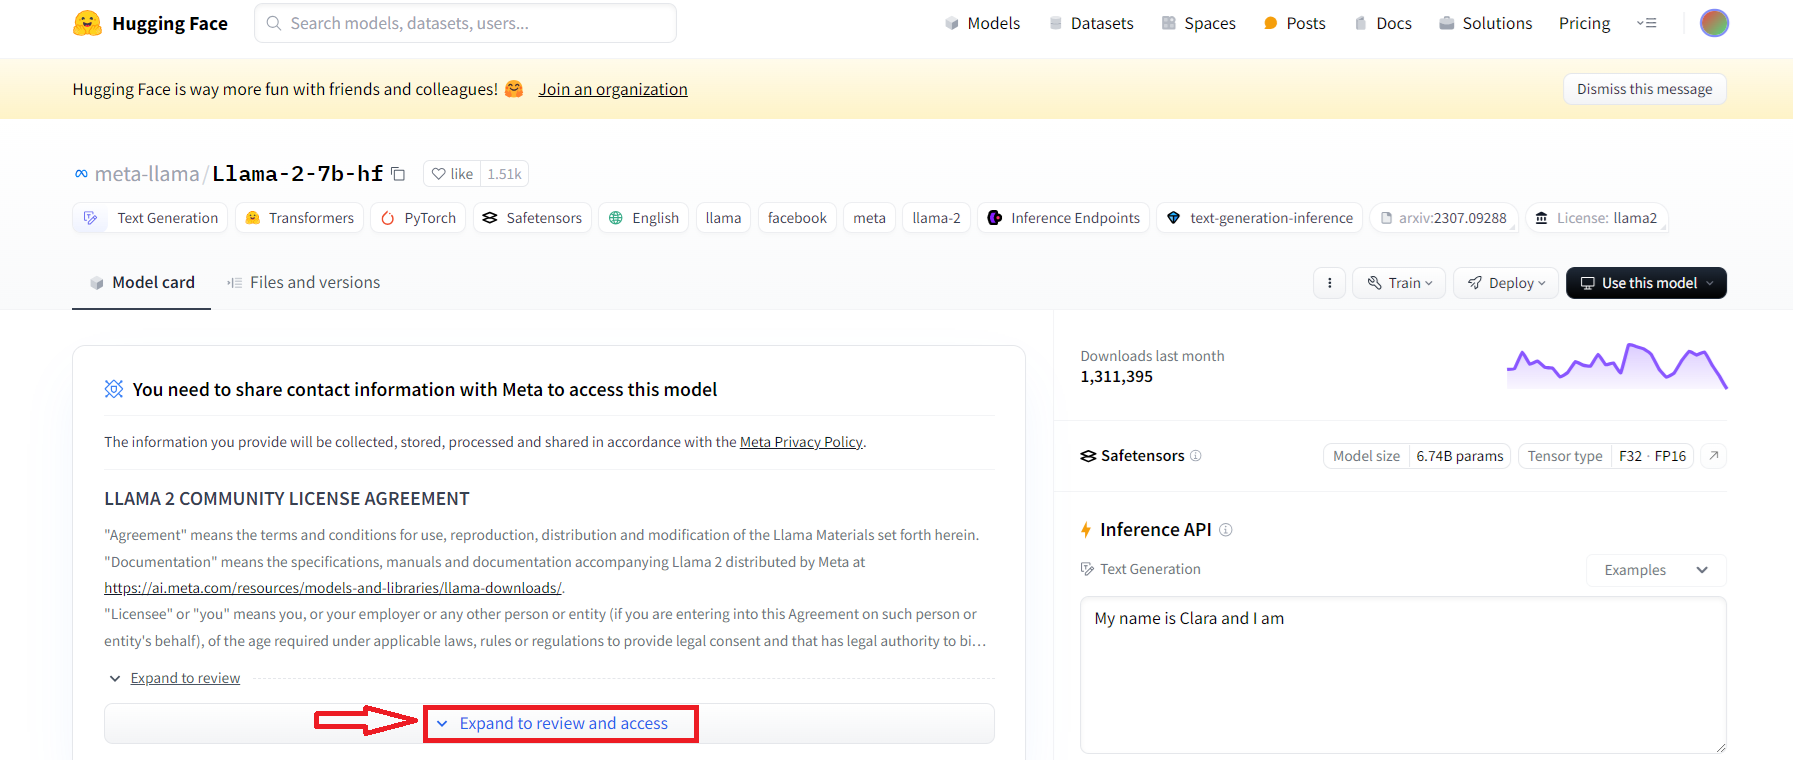

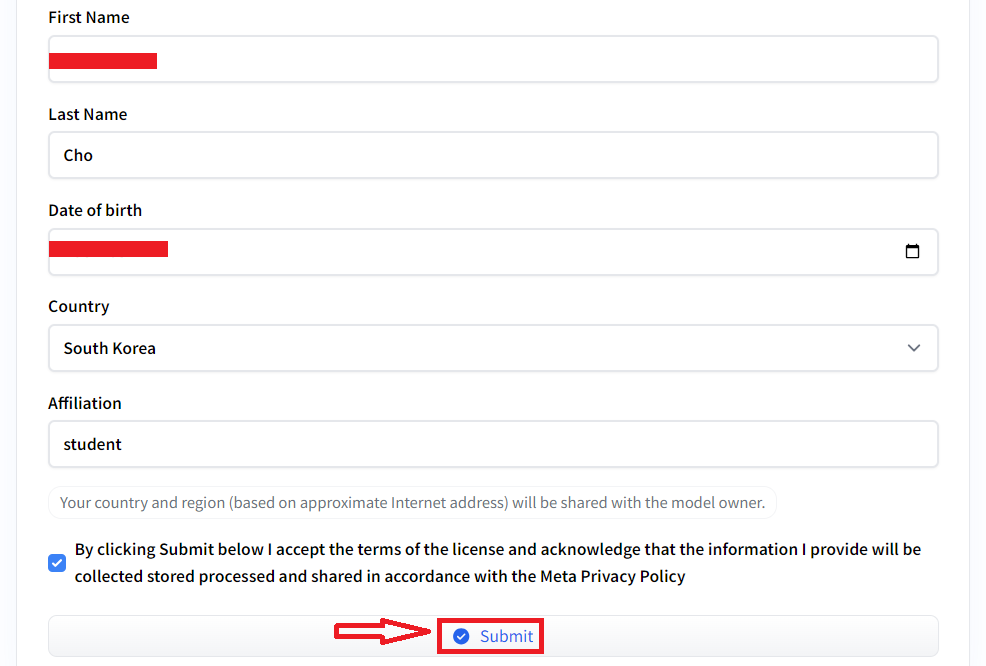

- 신청후 약 10 ~ 20분정도 걸림

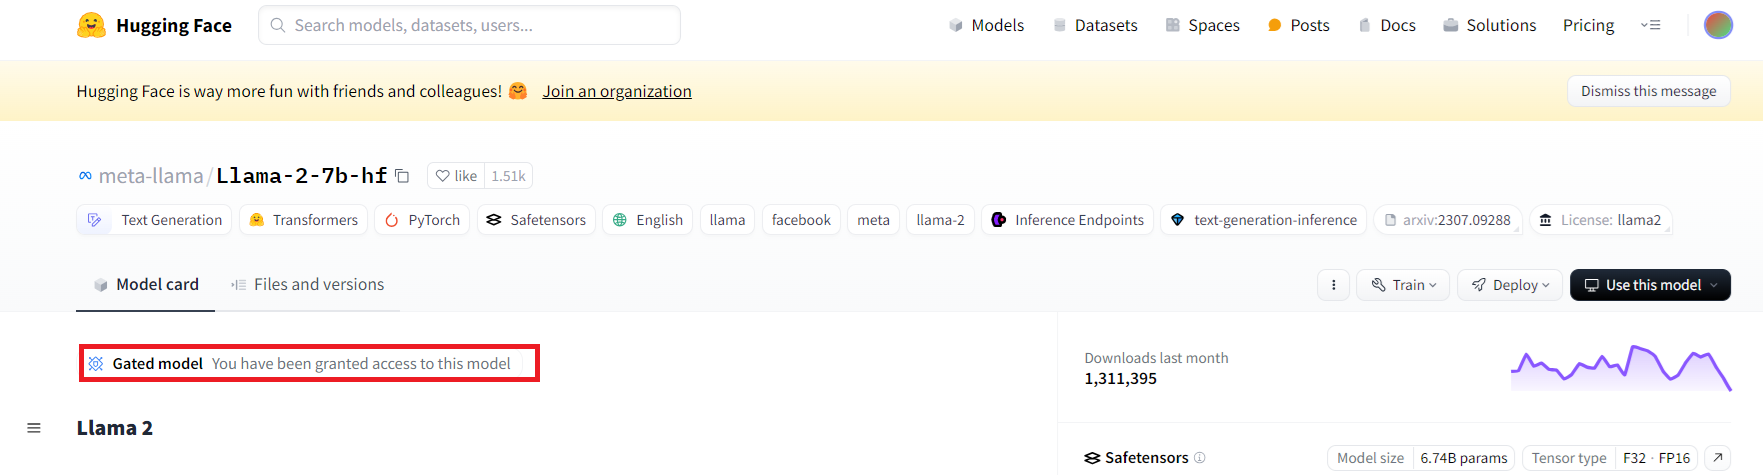

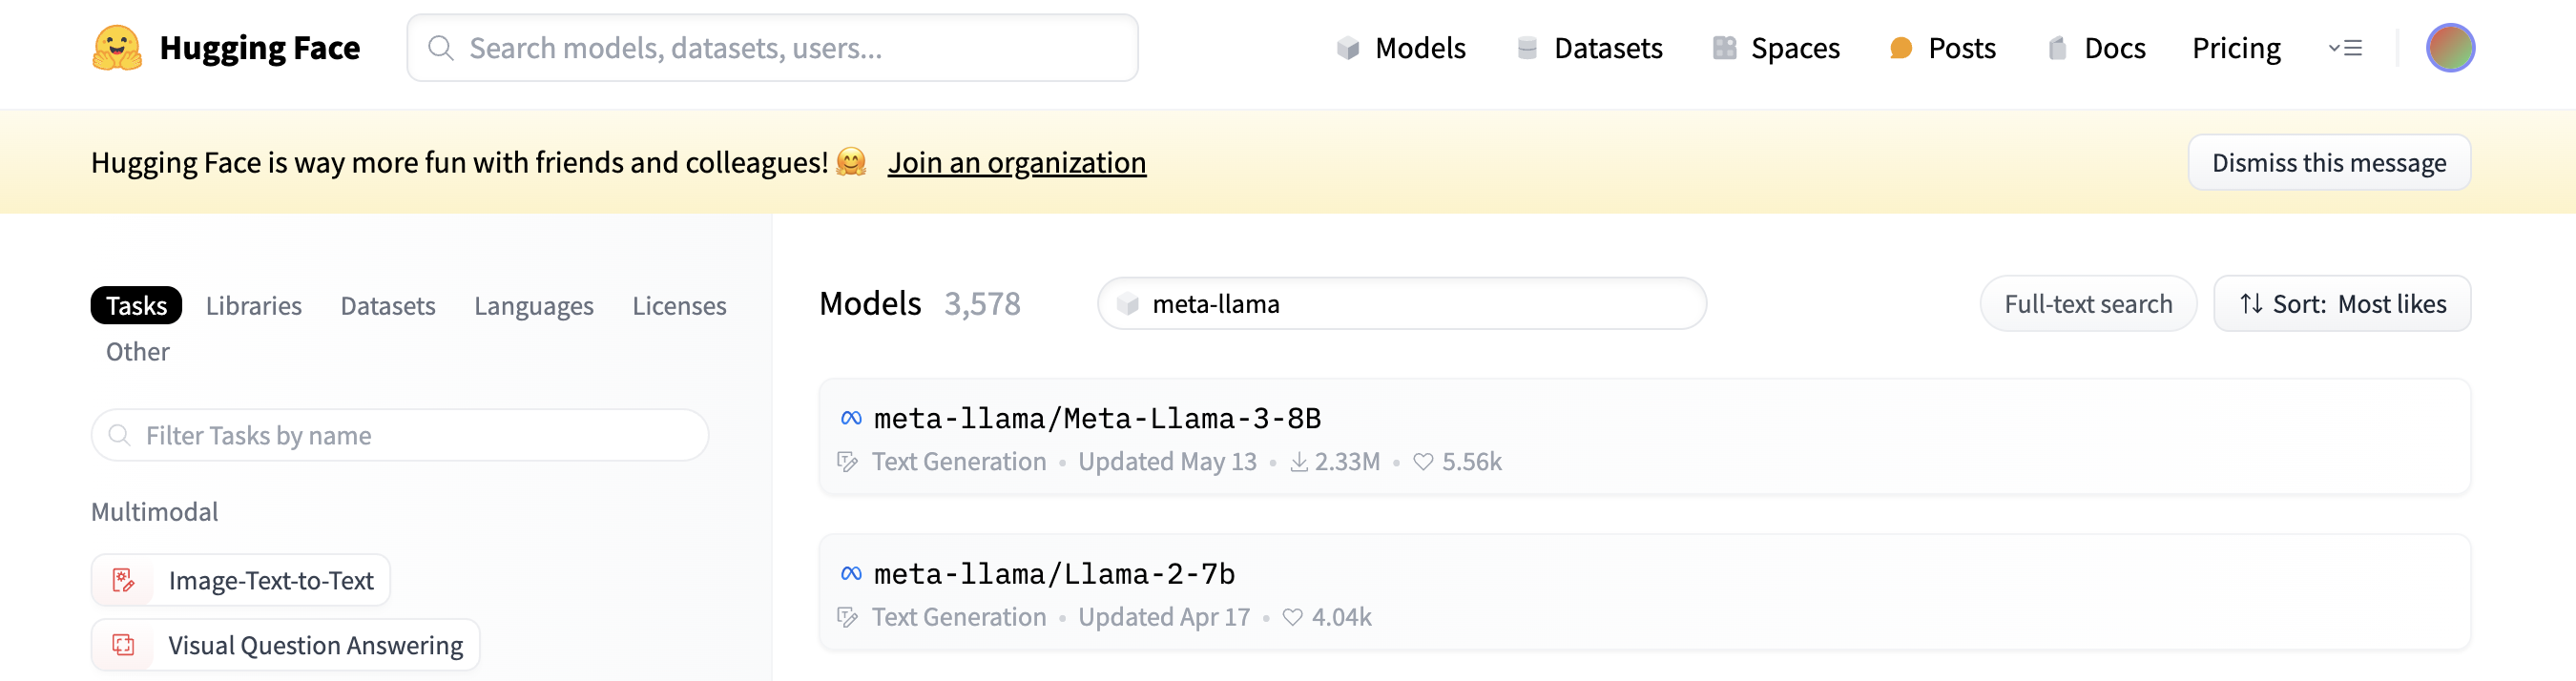

### Llama2 모델

In [ ]:
from transformers import AutoTokenizer
import transformers
import torch

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(
    model,
    use_auth_token=True,
)

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
def gen(x, max_length=200):
    sequences = pipeline(
        x,
        do_sample=True,
        top_k=10,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        max_length=max_length,
    )

    return sequences[0]["generated_text"].replace(x, "")

In [ ]:
print(gen("대한민국에서 유명한 인공지능 유튜버 3명만 나열해봐.", 500))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


 🤖💻

1. 네이버 TV - 네이버 TV는 대한민국에서 가장 큰 웹툰 플랫폼 중의 하나입니다. 네이버 TV에서 인공지능 웹툰을 찾을 수 있습니다.
2. 블랙핑크 - 블랙핑크는 대한민국에서 가장 유명한 인공지능 유튜버 중의 하나입니다. 블랙핑크의 웹툰은 매우 인기가 있으며, 다양한 주제를 다루고 있습니다.
3. 플래닛 - 플래닛은 대한민국에서 가장 큰 웹툰 플랫폼 중의 하나입니다. 플래닛에서 인공지능 웹툰을 찾을 수 있으며, 다양한 주제를 다루고 있습니다.

🤖💻 These are three popular AI YouTubers in South Korea. 😊


# LLaMA 3

## [Llama 3 특징](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)

- 학습 데이터를 2T에서 15T로 늘림
- context window를 4096에서 8192로 늘림
- GQA를 70B뿐만아니라 8B 모델에도 적용
- 토크나이저 크기를 32k에서 128k로 늘림
- instruction tuning시 SFT, rejection sampling, PPO, DPO 모두 적용
- 8B는 2023년 3월, 70B는 2023년 12월까지의 데이터로 학습
- 400+B 모델 학습중
- Multimodal 모델 공개 예정

### 벤치마크 성능
- LLaMA 70B의 성능이 제일 좋고, 전체적으로 LLaMA2 보다 많이 개선된게 보입니다.
- 전반적으로 LLaMA2 보다 약 10% ~ 40% 정도의 성능 향상이 일어난 것을 알 수 있습니다.

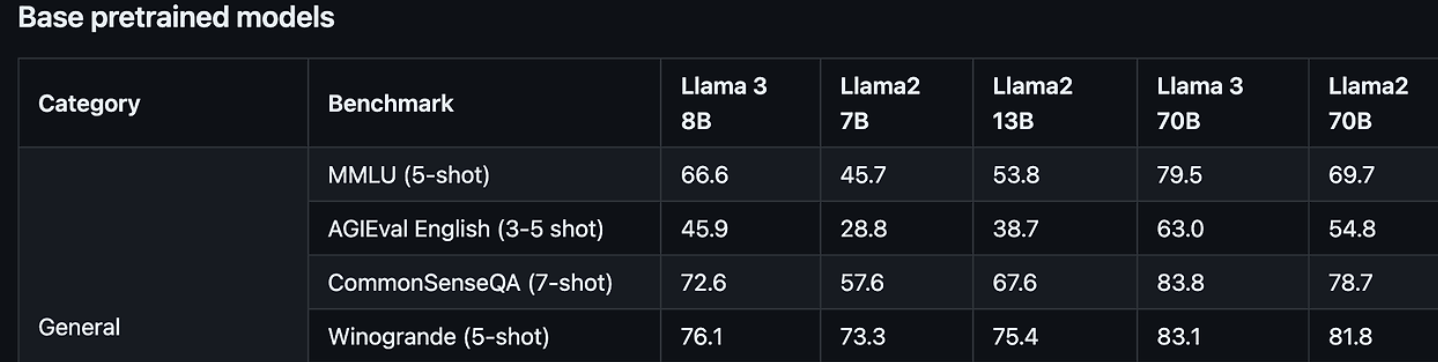

### 모델 아키텍처
- 역대 최대 규모의 모델인  Llama 3.1 405B를 15조 개가 넘는 토큰으로 훈련시키는 것은 큰 도전이었습니다.
- 이러한 규모로 학습을 진행하고 합리적인 시간 내에 결과를 달성하기 위해, 전체 훈련 스택을 대폭 최적화하고 모델 학습을 16,000개 이상의 H100 GPU로 확장했습니다.
- 이를 통해 405B는 이 규모로 학습된 최초의 Llama 모델이 되었습니다.

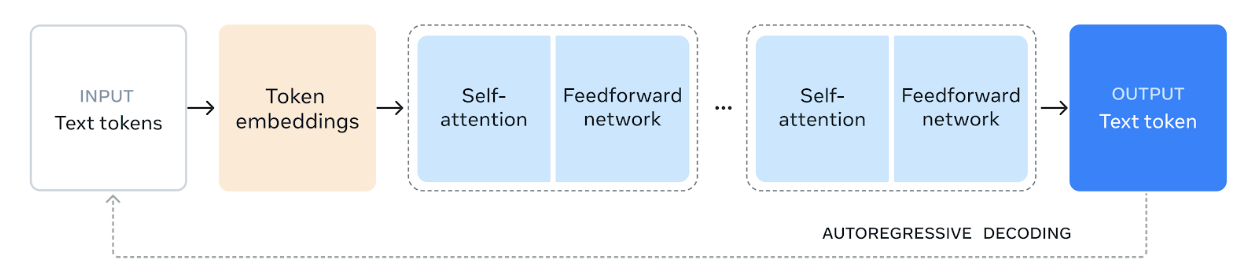

이를 위해, Meta는 모델 개발 과정을 확장 가능하고 단순하게 유지하는 데 중점을 두고 설계를 진행했습니다.
- 훈련 안정성을 최대화하기 위해 하이브리드 전문가 모델 대신 소폭의 조정이 적용된 표준 디코더 전용 트랜스포머 모델 아키텍처를 선택했습니다.
- 각 라운드마다 지도 학습 미세 조정(SFT; Supervised Fine-Tuning)과 직접 선호 최적화(DPO; Direct Preferred Optimization)를 사용하는 반복적인 사후 훈련 절차를 채택했습니다. 이를 통해 각 라운드에서 최고 품질의 합성 데이터를 생성하고 모든 기능의 성능을 향상시킬 수 있었습니다.

## [Llama 3 모델 사용](https://huggingface.co/blog/llama3)

### [라이센스 동의 신청](https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct)

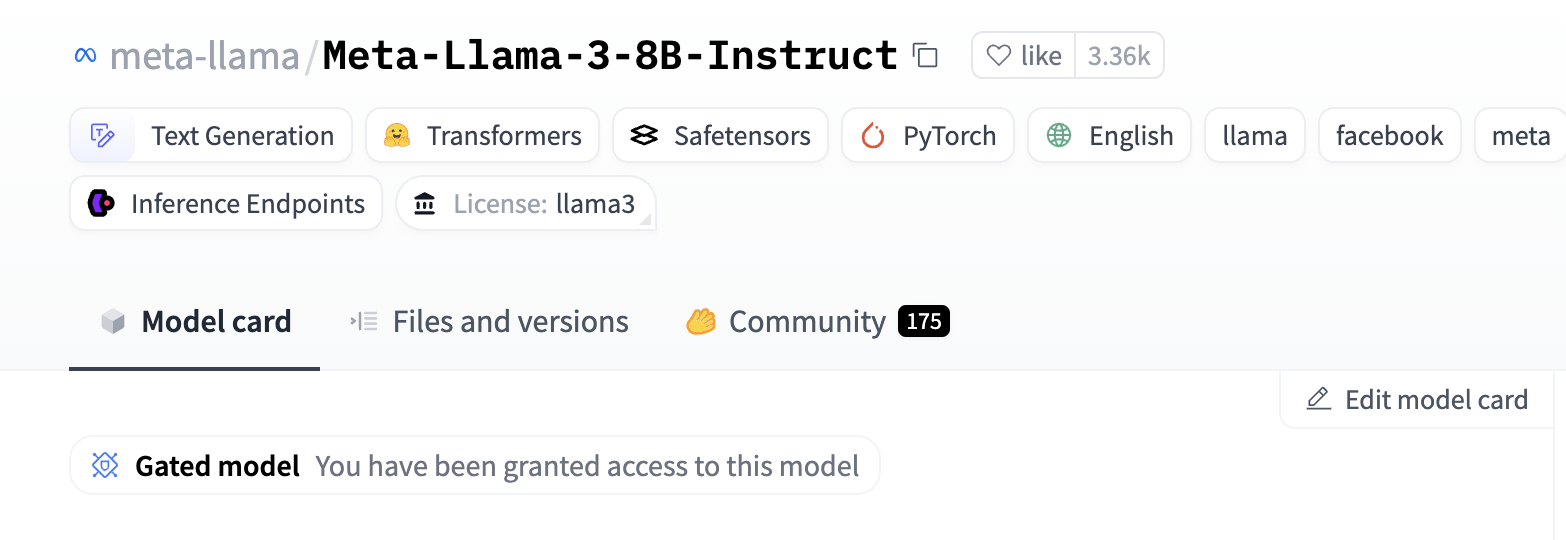

### Llama3 모델

In [ ]:
from transformers import pipeline
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="cuda",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


- 첫번째 예제

In [ ]:
messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

terminators = [
    pipe.tokenizer.eos_token_id,
    pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

In [ ]:
outputs = pipe(
    messages,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


In [ ]:
assistant_response = outputs[0]["generated_text"][-1]["content"]
print(assistant_response)

Arrrr, me hearty! I be Captain Chat, the scurviest pirate chatbot to ever sail the Seven Seas o' Conversation! Me and me trusty parrot, Polly, be here to swab the decks o' yer mind with me witty banter and me treasure trove o' knowledge! So hoist the colors, me matey, and let's set sail fer a swashbucklin' good time!


- 두번째 예제

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    use_auth_token=True,
)

def gen(x, max_length=200):
    sequences = pipe(
        x,
        do_sample=True,
        max_new_tokens=256,
        top_k=10,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        max_length=max_length,
    )

    return sequences[0]["generated_text"].replace(x, "")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print(gen("대한민국에서 유명한 인공지능 유튜버 3명만 나열해봐.", 500))

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  
1. **서은** (Seo Eun): 2020년부터 시작한 인공지능 유튜버로, 다양한 AI 관련 콘텐츠를 업로드하고 있습니다.  
2. **AI박사** (AI Ph.D.): 인공지능 전문가로 활동하고 있는 유튜버로, AI 관련 콘텐츠를 업로드하고 있습니다.  
3. **이수정** (Lee Soo-jung): 인공지능 관련 콘텐츠를 업로드하고 있는 유튜버로, AI 개발, AI 관련 뉴스, AI 예측 등을 콘텐츠로 다루고 있습니다.  

이러한 인공지능 유튜버는 AI 관련 콘텐츠를 업로드하고 있으며, 다양한 AI 관련 정보를 제공하고 있습니다.  
이러한 콘텐츠는 AI 개발자, AI 연구자, 일반인에게도 도움이 될 수 있습니다.  
따라서, 인공지능 유튜버를 통해 AI 관련 정보를 얻을 수 있습니다.  

이러한 인공지능 유튜버는 AI 관련 콘텐츠를 업로드하고 있으며, 다양한 AI 관련 정보를 제공하고 있습니다.  
이러한 콘텐츠는 AI 개발자, AI


## [Llama 3 모델별 비교](https://velog.io/@judy_choi/NLP-LLaMA3%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EB%AC%B8%EC%9E%A5-%EC%9A%94%EC%95%BD-%EC%8B%A4%EC%8A%B5-HuggingFace)

### 토크나이저 및 모델 설정

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

In [ ]:
# 모델은 다음 3개를 비교하였습니다
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
# model_id = "beomi/Llama-3-Open-Ko-8B-Instruct-preview"
# model_id = "beomi/Llama-3-KoEn-8B-Instruct-preview"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
	model_id,
    torch_dtype="auto",
    device_map="auto",
)

- GPU 확인

In [ ]:
# GPU가 잘 잡히면 'cuda:0' 출력
print(model.device)

### 템플릿 설정 및 모델 변수 설정

In [ ]:
def generate_response(model_id, system_message, user_message):
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype="auto",
        device_map="auto",
    )

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message},
    ]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt"
    ).to(model.device)

    terminators = [
        tokenizer.eos_token_id,
        tokenizer.convert_tokens_to_ids("<|eot_id|>")
    ]

    outputs = model.generate(
        input_ids,
        max_new_tokens=512,
        eos_token_id=terminators,
        do_sample=True,
        # beomi 모델의 경우 temperature 를 1로 줌 (더 다양한 답변 생성)
        # temperature=1,
        temperature=0.6,
        top_p=0.9

    )

    response = outputs[0][input_ids.shape[-1]:]

    return tokenizer.decode(response, skip_special_tokens=True)

### 텍스트 요약

- 요약할 원본 텍스트

In [ ]:
orginal_text = """
배경:
현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다.
본 연구의 목적은 설사변에서 발견되는 장내 기생충 현황을 알아보고, 대변 검경에 있어 활용 가능한 정도관리물질을 제조하여 그 안정성을 검증하고자 하였다.

방법:
본 연구는 대변배양이 의뢰된 검체 중 82건의 설사변을 대상으로 하였다.
현미경적 진단법은 직접도말법과 포르말린-에테르침전법으로 시행하였다. 작은와포자충, 람블편모충, 이질아메바에대해서는 ELISA 키트 (R-Biopharm) 및 xTAG® Gastrointestinal Pathogen Panel (Luminex Corporation) 을 이용하여 검사하였다.
이핵아메바와 블라스토시스티스 호미니스에 대해서는 특이 유전자를 타깃으로 하는 PCR을 수행하였다.
정도관리물질은 음성 대변 검체와 동해긴촌충의 충란을 섞어 제조하였다.
제조된 정도관리물질은 보존제 종류, 보관 온도, 보관 기간에 따라 안정성을 평가하였다.

결과:
총 82건의 설사변에서 현미경법으로는 유의한 기생충을 발견할 수 없었다.
작은와포자충, 람블편모충, 이질아메바에 대한 ELISA 결과, 82건 모두 음성이었다.
xTAG® Gastrointestinal Pathogen Panel을 이용한 결과, 작은와포자충 2건과 람블편모충 1건의양성 소견을 보였다.
이핵아메바와 블라스토시스티스 호미니스 유전체에 대한 PCR 검사 결과, 이핵아메바 양성 10건, 블라스토시스티스 호미니스 양성 2건이 관찰되었다.
본 연구에서 제조한 고농도정도관리물질은 3개월 보관 시까지 2가지 보존제 및 보관 온도와무관하게 충란이 관찰되었다.
저농도 정도관리물질의 경우, 14일보관 시까지는 2가지 보존제 및 보관 온도와 무관하게 충란이 관찰되었지만, 3주 이후에는 관찰되지 않았다.

결론:
대변 검경용 정도관리물질의 제조에 있어서 국내 설사환자에서 주로 발견되는 이핵아메바와 블라스토시스티스 호미니스가 포함되는 것이 필요하고, 저농도 물질의 경우 안정성이 떨어질 수있음을 감안하여야 할 것이다.
"""

In [ ]:
system_message = """
너는 요약을 수행하는 챗봇이야. 핵심 내용만 512 토큰 이내로 한국어로 요약해줘
"""

#### Meta-Llama-3-8B-Instruct

In [ ]:
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

llama3_summary_text = generate_response(
    model_id=model_id
    , system_message=system_message
    , user_message=orginal_text)

print("="*30)
print(llama3_summary_text)

#### Llama-3-Open-Ko-8B-Instruct-preview

In [ ]:
model_id = "beomi/Llama-3-Open-Ko-8B-Instruct-preview"

llama3_summary_text = generate_response(
    model_id=model_id
    , system_message=system_message
    , user_message=orginal_text)

print("="*30)
print(llama3_summary_text)

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/143 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


이해가 필요한 내용을 요약해 드리겠습니다. 대변검경검사에서 적절한 정도관리물질이 없어 질관리가 미진한 실정입니다. 이 연구에서는 설사변에서 주로 발견되는 장내 기생충 현황을 알아보고, 대변 검경에 있어 활용 가능한 정도관리물질을 제조하여 그 안정성을 검증했습니다. 82건의 설사변을 대상으로 하였는데, 현미경적 진단법으로는 유의한 기생충을 발견할 수 없었고, ELISA 키트와 PCR을 사용하여 검사한 결과 작은와포자충, 람블편모충, 이질아메바를 확인했습니다. 제조된 정도관리물질은 3개월 보관 시까지는 충란이 관찰되었지만, 저농도 물질의 경우 14일 보관 시까지는 관찰되지 않았습니다. 따라서 대변 검경용 정도관리물질의 제조에 있어 이핵아메바와 블라스토시스티스 호미니스가 포함되는 것이 필요하고, 저농도 물질의 경우 안정성이 떨어질 수 있음을 고려해야 합니다.


#### Llama-3-KoEn-8B-Instruct-preview

In [ ]:
model_id = "beomi/Llama-3-KoEn-8B-Instruct-preview"

llama3_summary_text = generate_response(
    model_id=model_id
    , system_message=system_message
    , user_message=orginal_text)

print("="*30)
print(llama3_summary_text)

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/3.00G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/1.29G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
